In [ ]:
# %cd /content/drive/MyDrive
# !git clone https://github.com/dbolya/yolact.git
# %cd yolact

/content/drive/MyDrive
Cloning into 'yolact'...
remote: Enumerating objects: 2936, done.
remote: Total 2936 (delta 0), reused 0 (delta 0), pack-reused 2936
Receiving objects: 100% (2936/2936), 21.20 MiB | 12.39 MiB/s, done.
Resolving deltas: 100% (2002/2002), done.
/content/drive/MyDrive/yolact


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


예측하기

In [ ]:
%cd /content/drive/MyDrive/yolact

/content/drive/MyDrive/yolact


In [ ]:
!python eval.py --trained_model=/content/drive/MyDrive/yolact/weights/yolact_resnet50_185_13764.pth --score_threshold=00.15 --top_k=10 --image=/content/KakaoTalk_20221219_023322204.jpg:/content/KakaoTalk_20221219_023322204_yolact.jpg

Config not specified. Parsed yolact_resnet50_config from the file name.

/usr/local/lib/python3.8/dist-packages/torch/jit/_recursive.py:234: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  warnings.warn("'{}' was found in ScriptModule constants, "
/usr/local/lib/python3.8/dist-packages/torch/jit/_recursive.py:234: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  warnings.warn("'{}' was found in ScriptModule constants, "
/usr/local/lib/python3.8/dist-packages/torch/jit/_recursive.py:234: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  warnings.warn("'{}' was found in ScriptModule constants, "
Loading model... Done.


데이터셋 분석

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from tqdm import tqdm

def attrlistmake2(Xml):
    data = open(
                    Xml,
                    'r',
                    encoding='utf-8'
                ).read()
    dom = BeautifulSoup(data, features='xml')
    
    attrlist2 = [[a.attrs,[b.attrs for b in a.findChildren()]] for a in dom.select('image')]
            
    return attrlist2
# 더 빠른 방법
def tmake2(attrlist2):
    T = [[dict(_[0],**__) for __ in _[1]] for _ in attrlist2]
    T = np.concatenate(T).tolist()
    T = pd.DataFrame(T)
    return T


from glob import glob

folder_path = glob('/content/drive/MyDrive/polygon/*')
zip_path = glob('/content/drive/MyDrive/polygon/*.zip')
folder_path = [path for path in folder_path if path not in zip_path]
print('폴더 개수:',len(folder_path))

from os import listdir

def fileids(path, ext = None):
    fileList = list()
    path = path if path[-1] == '/' else path + '/'
    for fileName in listdir(path):
        if fileName.endswith(ext):
            fileList.append(path + fileName)
    return fileList

jpg_path = [fileids(path, ext = 'jpg') for path in folder_path]
xml_path = [fileids(path, ext = 'xml') for path in folder_path]
png_path = [fileids(path, ext = 'png') for path in folder_path]

img_path = [jpg + png for jpg,png in zip(jpg_path, png_path)]


T = None

for _ in tqdm(xml_path):
    if T is None:
        T = tmake2(attrlistmake2(_[0]))
    else:
        T = pd.concat([T,tmake2(attrlistmake2(_[0]))])

T.reset_index()
# T.to_csv("T.csv")
# T.to_pickle("T.pkl")

T

70


100%|██████████| 70/70 [00:57<00:00,  1.23it/s]


,id,name,width,height,label,occluded,points,z_order,group_id
0,0,ZED3_KSC_094534_L_P028301.png,1920,1080,person,0,"1160.04,229.85;1168.54,218.75;1172.56,212.14;1...",1,NaN
1,0,ZED3_KSC_094534_L_P028301.png,1920,1080,tree_trunk,0,"687.94,194.09;733.14,191.61;731.91,457.24;723....",5,NaN
2,0,ZED3_KSC_094534_L_P028301.png,1920,1080,tree_trunk,0,"170.81,0.64;173.39,150.79;172.36,282.37;166.17...",4,NaN
3,0,ZED3_KSC_094534_L_P028301.png,1920,1080,truck,0,"32.82,444.65;38.21,439.68;42.35,441.75;51.89,4...",6,2
4,0,ZED3_KSC_094534_L_P028301.png,1920,1080,bicycle,0,"1109.29,351.67;1106.65,352.98;1105.45,356.34;1...",3,1
...,...,...,...,...,...,...,...,...,...
386,49,ZED3_KSC_094527_L_P028300.png,1920,1080,pole,0,"387.14,485.89;393.26,495.27;405.51,496.49;411....",5,NaN
387,49,ZED3_KSC_094527_L_P028300.png,1920,1080,tree_trunk,0,"449.26,249.26;478.16,255.04;475.78,269.66;473....",6,NaN
388,49,ZED3_KSC_094527_L_P028300.png,1920,1080,car,0,"128.43,383.63;143.68,376.42;158.11,372.15;179....",9,NaN
389,49,ZED3_KSC_094527_L_P028300.png,1920,1080,tree_trunk,0,"603.19,271.94;622.57,272.28;625.97,281.80;623....",7,NaN


In [ ]:
T.label.value_counts()

tree_trunk                  4958
car                         4636
pole                        4256
truck                       2206
bollard                     2125
traffic_light               2070
traffic_sign                2050
person                      1012
barricade                    879
bus                          510
movable_signage              459
power_controller             294
stop                         284
traffic_light_controller     262
bicycle                      261
motorcycle                   112
fire_hydrant                 105
chair                         60
bench                         54
potted_plant                  48
table                         34
carrier                       25
kiosk                         20
stroller                      18
dog                            5
Name: label, dtype: int64

In [ ]:
(T.name.unique()).shape

(3488,)

In [ ]:
T = T[['name', 'label']]

In [ ]:
labelmap = {
 'barricade' : 1,
 'bench' : 2, 'chair' : 2,'table' : 2,
 'bicycle' : 3,
 'bollard' : 4, 'fire_hydrant' : 4,
 'bus' : 5,
 'car' : 6,
 'kiosk' : 7, 'power_controller': 7,
 'motorcycle' : 8, 'scooter' : 8,
 'movable_signage' : 9,
 'person' : 10,
 'pole' : 11,
 'potted_plant' : 12,
 'stop' : 13,
 'traffic_light' : 14,
 'traffic_light_controller' : 15,
 'tree_trunk' : 16,
 'truck' : 17,
 'traffic_sign' : -1, 'carrier' : -1, 'stroller': -1,
 'dog': -1, 'cat' : -1, 'parking_meter' : -1, 'wheelchair' : -1}

In [ ]:
rlabelmap = {}
for k,v in labelmap.items():
    if v not in rlabelmap:
        rlabelmap[v] = []
    rlabelmap[v].append(k)

{1: ['barricade'],
 2: ['bench', 'chair', 'table'],
 3: ['bicycle'],
 4: ['bollard', 'fire_hydrant'],
 5: ['bus'],
 6: ['car'],
 7: ['kiosk', 'power_controller'],
 8: ['motorcycle', 'scooter'],
 9: ['movable_signage'],
 10: ['person'],
 11: ['pole'],
 12: ['potted_plant'],
 13: ['stop'],
 14: ['traffic_light'],
 15: ['traffic_light_controller'],
 16: ['tree_trunk'],
 17: ['truck'],
 -1: ['traffic_sign',
  'carrier',
  'stroller',
  'dog',
  'cat',
  'parking_meter',
  'wheelchair']}

In [ ]:
from glob import glob

folder_path = glob('/content/drive/MyDrive/polygon/*')
zip_path = glob('/content/drive/MyDrive/polygon/*.zip')
folder_path = [path for path in folder_path if path not in zip_path]
print('폴더 개수:',len(folder_path))

from os import listdir

def fileids(path, ext = None):
    fileList = list()
    path = path if path[-1] == '/' else path + '/'
    for fileName in listdir(path):
        if fileName.endswith(ext):
            fileList.append(path + fileName)
    return fileList

jpg_path = [fileids(path, ext = 'jpg') for path in folder_path]
xml_path = [fileids(path, ext = 'xml') for path in folder_path]
png_path = [fileids(path, ext = 'png') for path in folder_path]

img_path = [jpg + png for jpg,png in zip(jpg_path, png_path)]

폴더 개수: 70


In [ ]:
from bs4 import BeautifulSoup
from tqdm import tqdm

#filepath 코드로 xml_path 뽑아서 진행

img_label_dict = dict()
label_img_dict = dict()

for xml in tqdm(xml_path):
    path = xml[0].replace(xml[0].split('/')[-1], '')
    xml = BeautifulSoup(open(xml[0], encoding='utf-8'),'xml')
    for image in xml.select('image'):
        name = path + image['name']
        if name not in img_label_dict:
            img_label_dict[name] = []
        for polygon in image.select('polygon'):
            label = labelmap[polygon['label']]
            img_label_dict[name].append(label)
            if label not in label_img_dict:
                label_img_dict[label] = []
            label_img_dict[label].append(name)


100%|██████████| 70/70 [01:06<00:00,  1.05it/s]


In [ ]:
len(img_label_dict)

3488

In [ ]:
len(label_img_dict['traffic_light']) # 신호등 분류는 나중에

In [ ]:
len(label_img_dict)

18

In [ ]:
datalist = []
N = 100
for k,v in label_img_dict.items():
    if k != -1:
        for i, j in enumerate(v):      
            datalist.append(j)
            if i == N-1:
                break

datalist = list(set(datalist))
len(datalist)

599

In [ ]:
T = dict()
for data in datalist:
    for i in img_label_dict[data]:
        i = rlabelmap[i]
        if i[0] not in T:
            T[i[0]] = 1
        else:
            T[i[0]] += 1

T

{'motorcycle': 100,
 'traffic_light_controller': 112,
 'person': 482,
 'pole': 820,
 'tree_trunk': 1124,
 'movable_signage': 149,
 'traffic_light': 674,
 'bollard': 592,
 'traffic_sign': 474,
 'car': 1146,
 'barricade': 108,
 'bus': 154,
 'bicycle': 103,
 'kiosk': 113,
 'stop': 118,
 'truck': 441,
 'potted_plant': 48,
 'bench': 104}

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(T.items(), columns = ['label', 'count']).sort_values('count',ascending=False).reset_index(drop=True)

,label,count
0,car,1146
1,tree_trunk,1124
2,pole,820
3,traffic_light,674
4,bollard,592
5,person,482
6,traffic_sign,474
7,truck,441
8,bus,154
9,movable_signage,149


In [ ]:
path = datalist[0]

In [ ]:
path.split('/')[-1]

'ZED3_KSC_094534_L_P028301.png'

데이터셋 폴더로 옮기기

In [ ]:
from glob import glob
import shutil
import time

# tr_remain = trlist
# te_remain = telist

new_path = '/content/drive/MyDrive/YolactDataset/train'
paths = datalist

while len(datalist) != len(glob('/content/drive/MyDrive/YolactDataset/train/*')):
    for path in paths:
        try:
            shutil.move(path, new_path + '/' + path.split('/')[-1])
            print('moved ', path)
        except:
            print('pass')
            pass


In [ ]:
len(glob('/content/drive/MyDrive/YolactDataset/train/*'))

599

In [ ]:
len(datalist)

599

Datalist에 있는거로 json 만들기

In [ ]:
imgstrip = lambda x: x.split('/')[-1]
imglist = [imgstrip(a) for a in datalist]

In [ ]:
len(imglist)

599

In [ ]:
from bs4 import BeautifulSoup
from tqdm import tqdm
import json
import numpy as np

#coco에 맞게 json 만들기

coco = dict()
images = []
annotations = []
idcount = 1
labeldict = dict()
labelcount = 1
imwanno = []
annoidcount = 1
catids = []

for xml in tqdm(xml_path):
    path = xml[0].replace(xml[0].split('/')[-1], '')
    xml = BeautifulSoup(open(xml[0], encoding='utf-8'),'xml')

    # 있어야 할 라벨 =/= 있는 라벨이므로 이 정보는 쓰지 않음
    # for label in xml.select('label'):
    #     lbname = label.text.strip()
    #     if lbname not in labeldict:
    #         labeldict[lbname] = labelcount
    #         labelcount += 1

    for im in xml.select('image'):
        # filename = path + im['name']
        filename = im['name']
        height = int(im['height'])
        width = int(im['width'])
        # id = idcount + im['id'] - 1
        id = idcount
        if filename in imglist:        
            images.append(
                {
                'id':id,
                'width': width,
                'height': height,
                'file_name': filename
                }
            )
            idcount += 1  
            for polygon in im.select('polygon'):
                annoid = annoidcount            
                #폴리곤 읽으면서 라벨 딕셔너리 만듬
                label = polygon['label']
                try:
                    objid = labelmap[label]
                except:
                    print('label not in labelmap :', label)
                    objid = -1
                if objid != -1:
                    segmentation = list(np.array([p.split(',') for p in polygon['points'].split(";")]).flatten().astype(float))          
                    #area, bbox 구하기
                    x = []
                    y = []
                    for i, f in enumerate(segmentation):
                        if i%2==0:
                            x.append(f)
                        else:
                            y.append(f)
                    area = 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
                    bbox = [np.min(x), np.min(y), np.max(x)-np.min(x), np.max(y)-np.min(y)]            
                    annotations.append(
                        {
                        'id': annoid,
                        'image_id': id,
                        'category_id': objid,
                        'segmentation': [segmentation],
                        'area': area,
                        'bbox': bbox,
                        'iscrowd': 0
                        }
                    )
                    annoidcount += 1
                    imwanno.append(id)
                    catids.append(objid)
 
imwanno = list(set(imwanno))
catids = list(set(catids))

coco = {
    'images': images,
    'annotations' : annotations
}        
print(' ')
print('이미지 개수:', len(images))
print('사물 개수:', len(annotations))
print('사물 있는 이미지 개수:',len(imwanno))
print('사물 종류 개수:', len(catids))

print('saving json...')
json_object = json.dumps(coco)
with open('/content/drive/MyDrive/YolactDataset/train/coco.json', 'w', encoding='utf-8') as make_file:  
    make_file.write(json_object)
print('json saved!')

100%|██████████| 70/70 [00:02<00:00, 26.02it/s]


 
이미지 개수: 599
사물 개수: 6388
사물 있는 이미지 개수: 599
사물 종류 개수: 17
saving json...
json saved!


In [ ]:
a = 0
b = []
for k,v in img_label_dict.items():
    if k in datalist:
        for _ in v:
            if _ != -1:
                a += 1
a

6388

학습

CUDA, torch는 train할 때만 수정하면 됨!

--save_interval: 저장 간격, iter 기준 epoch_size = data개수//batch_size(=8) epoch_size에 맞추면 epoch마다 저장

In [ ]:
# install cuda 10.2
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!sudo mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!sudo add-apt-repository "deb https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/ /"
!apt-get update
!apt-get -y install cuda-10.2

--2022-12-18 18:45:42--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.39.144
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [application/octet-stream]
Saving to: ‘cuda-ubuntu1804.pin’

cuda-ubuntu1804.pin 100%[===================>]     190  --.-KB/s    in 0s      

2022-12-18 18:45:42 (9.74 MB/s) - ‘cuda-ubuntu1804.pin’ saved [190/190]

Executing: /tmp/apt-key-gpghome.t6ye0BDyGe/gpg.1.sh --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
gpg: requesting key from 'https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub'
gpg: key F60F4B3D7FA2AF80: "cudatools <cudatools@nvidia.com>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Ge

In [ ]:
# install pytorch 1.11
!pip install torch==1.11.0+cu102 torchvision==0.12.0+cu102 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu102

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu102
     |████████████████████████████████| 750.6 MB 19 kB/s 
     |████████████████████████████████| 21.0 MB 1.4 MB/s 
     |████████████████████████████████| 2.9 MB 59.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0+cu116
    Uninstalling torch-1.13.0+cu116:
      Successfully uninstalled torch-1.13.0+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0+cu116
    Uninstalling torchvision-0.14.0+cu116:
      Successfully uninstalled torchvision-0.14.0+cu116
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.0+cu116
    Uninstalling torchaudio-0.13.0+cu116:
      Successfully uninstalled torchaudio-0.13.0+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source 

In [ ]:
import torch
print("Torch version:{}".format(torch.__version__))
print("cuda version: {}".format(torch.version.cuda))
print("cudnn version:{}".format(torch.backends.cudnn.version()))

Torch version:1.13.0+cu116
cuda version: 11.6
cudnn version:8302


In [ ]:
%cd /content/drive/MyDrive/yolact

/content/drive/MyDrive/yolact


In [ ]:
!export CUDA_VISIBLE_DEVICES=[gpus]

In [ ]:
#시작하는 코드
!python train.py --start_iter=-1 --config=yolact_resnet50_config --save_interval=74

In [ ]:
#이어하기 코드
!python train.py --resume=weights/yolact_resnet50_9_740.pth --start_iter=-1 --config=yolact_resnet50_config --save_interval=74

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
loading annotations into memory...
Done (t=0.11s)
creating index...
index created!
/usr/local/lib/python3.8/dist-packages/torch/jit/_recursive.py:234: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  warnings.warn("'{}' was found in ScriptModule constants, "
/usr/local/lib/python3.8/dist-packages/torch/jit/_recursive.py:234: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  warnings.warn("'{}' was found in ScriptModule constants, "
/usr/local/lib/python3.8/dist-packages/torch/jit/_recursive.py:234: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  warnings.warn("'{}' was found in ScriptModule constants, "
Resuming training, loading weights/yolact_resnet50_9_740.pth...
/usr/loca

학습 로그

In [ ]:
from utils.logger import LogVisualizer

In [ ]:
vis = LogVisualizer()

In [ ]:
vis.sessions('/content/drive/MyDrive/yolact/logs/yolact_resnet50.log')

Session   0:        1 entries | 0:00:00 elapsed
Session   1:        1 entries | 0:00:00 elapsed
Session   2:        1 entries | 0:00:00 elapsed
Session   3:      777 entries | 0:58:02 elapsed
Session   4:    13162 entries | 17:03:11 elapsed


In [ ]:
vis.add('/content/drive/MyDrive/yolact/logs/yolact_resnet50.log', session =[3,4])

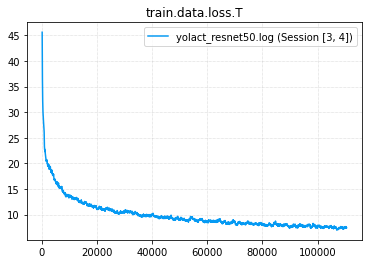

In [ ]:
vis.plot('train', 'x.data.iter * s.data.batch_size', 'x.data.loss.T', smoothness=100)

In [ ]:
vis.txtsave('train', 'x.data.iter * s.data.batch_size', 'x.data.loss.T', smoothness=100)

./train.txt


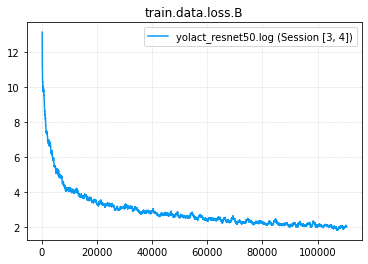

In [ ]:
vis.plot('train', 'x.data.iter * s.data.batch_size', 'x.data.loss.B', smoothness=100)

In [ ]:
vis.txtsave('train', 'x.data.iter * s.data.batch_size', 'x.data.loss.B', smoothness=100)

./train.txt


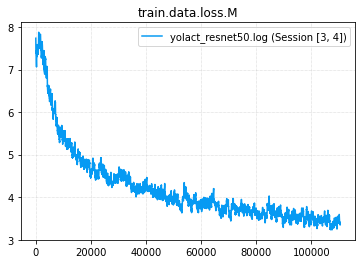

In [ ]:
vis.plot('train', 'x.data.iter * s.data.batch_size', 'x.data.loss.M', smoothness=100)

In [ ]:
vis.txtsave('train', 'x.data.iter * s.data.batch_size', 'x.data.loss.M', smoothness=100)

./train.txt


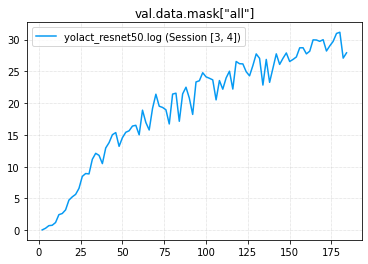

In [ ]:
vis.plot('val', 'x.data.epoch', 'x.data.mask["all"]')

In [ ]:
vis.txtsave('val', 'x.data.epoch', 'x.data.mask["all"]')

./val.txt


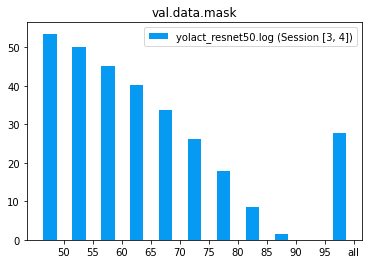

In [ ]:
vis.bar('val', 'x.data.mask', x_idx=-1)

모델 변환(torch -> torchscript -> coreml)

In [ ]:
!pip install coremltools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 4.7 MB/s 


In [ ]:
%cd /content/drive/MyDrive/yolact

/content/drive/MyDrive/yolact


In [ ]:
import torch
import torch.onnx
import matplotlib as plt
from yolact_onnx import Yolact
from eval_onnx import evalimage
from data import cfg, set_cfg, set_dataset

In [ ]:
set_cfg('yolact_resnet50_config') # config 수정하는거 잊지 말기

In [ ]:
net = Yolact()
net.load_weights('/content/drive/MyDrive/yolact/yolact_resnet50_54_800000.pth')
# net.cuda()
net.eval()
example_input = torch.rand(1,3,550, 550)

torchscript 형식

In [ ]:
traced_net = torch.jit.trace(net, torch.rand(1,3,550, 550)) #???? example input을 변수로 지정하지 않고 하면 잘 됨

In [ ]:
traced_net.save('/content/drive/MyDrive/yolact/traced_net.pt')

In [ ]:
traced_net._save_for_lite_interpreter('/content/drive/MyDrive/yolact/traced_net.ptl')

optimized script 형식

In [ ]:
from torch.utils.mobile_optimizer import optimize_for_mobile
traced_net_optimized = optimize_for_mobile(traced_net)
traced_net_optimized._save_for_lite_interpreter('/content/drive/MyDrive/yolact/traced_net_optimized.ptl')

quantized optimized script 형식

In [ ]:
backend = 'qnnpack'
net.qconfig = torch.quantization.get_default_qconfig(backend)
torch.backends.quantized.engine = backend

quantized_net = torch.quantization.quantize_dynamic(net, qconfig_spec={torch.nn.Linear}, dtype=torch.qint8)
scripted_quantized_net = torch.jit.trace(quantized_net,torch.rand(1,3,550, 550))
scripted_quantized_net.save("/content/drive/MyDrive/yolact/scripted_quantized_net.pt")
scripted_quantized_net._save_for_lite_interpreter('/content/drive/MyDrive/yolact/scripted_quantized_net.ptl')

In [ ]:
from torch.utils.mobile_optimizer import optimize_for_mobile
optimized_scripted_quantized_net = optimize_for_mobile(scripted_quantized_net)
optimized_scripted_quantized_net._save_for_lite_interpreter("/content/drive/MyDrive/yolact/scripted_quantized_optimized_net.ptl")

mlpackage 또는 mlmodel 형식

In [ ]:
import coremltools as ct

In [ ]:
# Using image_input in the inputs parameter:
# Convert to Core ML program using the Unified Conversion API.
# model = ct.convert(
#     traced_net,
#     convert_to="mlprogram",
#     inputs=[ct.TensorType(shape=example_input.shape)]
#  )
# model.save("/content/drive/MyDrive/yolactcustom.mlpackage")

In [ ]:
model = ct.convert(
    traced_net,
    inputs=[ct.TensorType(shape=example_input.shape)]
 )
model.save("/content/drive/MyDrive/yolactbase.mlmodel")

Running MIL Common passes:   0%|          | 0/39 [00:00<?, ? passes/s]/usr/local/lib/python3.8/dist-packages/coremltools/converters/mil/mil/passes/name_sanitization_utils.py:107: UserWarning: Input, 'x.1', of the source model, has been renamed to 'x_1' in the Core ML model.
  warnings.warn(msg.format(var.name, new_name))
/usr/local/lib/python3.8/dist-packages/coremltools/converters/mil/mil/passes/name_sanitization_utils.py:135: UserWarning: Output, '980', of the source model, has been renamed to 'var_980' in the Core ML model.
  warnings.warn(msg.format(var.name, new_name))
/usr/local/lib/python3.8/dist-packages/coremltools/converters/mil/mil/passes/name_sanitization_utils.py:135: UserWarning: Output, '1308', of the source model, has been renamed to 'var_1308' in the Core ML model.
  warnings.warn(msg.format(var.name, new_name))
/usr/local/lib/python3.8/dist-packages/coremltools/converters/mil/mil/passes/name_sanitization_utils.py:135: UserWarning: Output, '1314', of the source model, 

모델 전체 레이어 뽑기 시도한것

In [ ]:
%cd /content/drive/MyDrive/yolact

/content/drive/MyDrive/yolact


In [ ]:
import torch
import matplotlib as plt
from yolact import Yolact
from eval import evalimage
from data import cfg, set_cfg, set_dataset

In [ ]:
set_cfg('yolact_resnet50_config') # config 수정하는거 잊지 말기

In [ ]:
net = Yolact()

In [ ]:
net.load_weights('/content/drive/MyDrive/yolact/weights/yolact_resnet50_185_13764.pth')

In [ ]:
net.eval()

In [ ]:
example_input = torch.rand(1,3,550, 550, device = 'cuda')

In [ ]:
out = net(torch.rand(1,3,550, 550))

In [ ]:
out

[{'detection': None, 'net': Yolact(
    (backbone): ResNetBackbone(
      (layers): ModuleList(
        (0): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu): ReLU(inplace=True)
            (downsample): Sequential(
              (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
          )
   

In [ ]:
type(out)

list

In [ ]:
traced_net = torch.jit.trace(net, torch.rand(1,3,550, 550, device = 'cuda')) #???? example input을 변수로 지정하지 않고 하면 잘 됨

In [ ]:
%cd /content/drive/MyDrive/yolactcoreml

/content/drive/MyDrive/yolactcoreml


In [ ]:
# !git clone https://github.com/Ma-Dan/yolact.git

Cloning into 'yolact'...
remote: Enumerating objects: 2555, done.
remote: Total 2555 (delta 0), reused 0 (delta 0), pack-reused 2555
Receiving objects: 100% (2555/2555), 21.03 MiB | 16.63 MiB/s, done.
Resolving deltas: 100% (1745/1745), done.


In [ ]:
!git branch -a

* master
  remotes/origin/HEAD -> origin/master
  remotes/origin/chong-dev
  remotes/origin/coreml
  remotes/origin/dev
  remotes/origin/fanyix_dev
  remotes/origin/master
  remotes/origin/onnx


In [ ]:
# !git clone --branch coreml https://github.com/Ma-Dan/yolact.git

Cloning into 'yolact'...
remote: Enumerating objects: 2555, done.
remote: Total 2555 (delta 0), reused 0 (delta 0), pack-reused 2555
Receiving objects: 100% (2555/2555), 21.03 MiB | 14.17 MiB/s, done.
Resolving deltas: 100% (1745/1745), done.


In [ ]:
%cd /content/drive/MyDrive/yolactcoreml/yolact

/content/drive/MyDrive/yolactcoreml/yolact


In [ ]:
!python eval.py --trained_model=/content/drive/MyDrive/yolact/yolact_resnet50_54_800000.pth --image=/content/drive/MyDrive/dog550.png

coreml 뽑기(중복)

In [ ]:
import torch
import matplotlib as plt
from yolact import Yolact
from data import cfg, set_cfg, set_dataset
import coremltools as ct

Multiple GPUs detected! Turning off JIT.


In [ ]:
set_cfg('yolact_resnet50_config') # config 수정하는거 잊지 말기

In [ ]:
net = Yolact()
net.load_weights('/content/drive/MyDrive/yolact/yolact_resnet50_54_800000.pth')
net.cuda()
net.eval()
example_input = torch.rand(1,3,550, 550, device = 'cuda')

In [ ]:
traced_net = torch.jit.trace(net, torch.rand(1,3,550, 550, device = 'cuda')) #???? example input을 변수로 지정하지 않고 하면 잘 됨

In [ ]:
traced_net

Yolact(
  original_name=Yolact
  (backbone): ResNetBackbone(
    original_name=ResNetBackbone
    (layers): ModuleList(
      original_name=ModuleList
      (0): Sequential(
        original_name=Sequential
        (0): Bottleneck(
          original_name=Bottleneck
          (conv1): Conv2d(original_name=Conv2d)
          (bn1): BatchNorm2d(original_name=BatchNorm2d)
          (conv2): Conv2d(original_name=Conv2d)
          (bn2): BatchNorm2d(original_name=BatchNorm2d)
          (conv3): Conv2d(original_name=Conv2d)
          (bn3): BatchNorm2d(original_name=BatchNorm2d)
          (relu): ReLU(original_name=ReLU)
          (downsample): Sequential(
            original_name=Sequential
            (0): Conv2d(original_name=Conv2d)
            (1): BatchNorm2d(original_name=BatchNorm2d)
          )
        )
        (1): Bottleneck(
          original_name=Bottleneck
          (conv1): Conv2d(original_name=Conv2d)
          (bn1): BatchNorm2d(original_name=BatchNorm2d)
          (conv2)

In [ ]:
model = ct.convert(
    traced_net,
    inputs=[ct.TensorType(shape=example_input.shape)]
 )

Running MIL Common passes:   0%|          | 0/39 [00:00<?, ? passes/s]/usr/local/lib/python3.8/dist-packages/coremltools/converters/mil/mil/passes/name_sanitization_utils.py:107: UserWarning: Input, 'x.1', of the source model, has been renamed to 'x_1' in the Core ML model.
  warnings.warn(msg.format(var.name, new_name))
/usr/local/lib/python3.8/dist-packages/coremltools/converters/mil/mil/passes/name_sanitization_utils.py:135: UserWarning: Output, '980', of the source model, has been renamed to 'var_980' in the Core ML model.
  warnings.warn(msg.format(var.name, new_name))
/usr/local/lib/python3.8/dist-packages/coremltools/converters/mil/mil/passes/name_sanitization_utils.py:135: UserWarning: Output, '1304', of the source model, has been renamed to 'var_1304' in the Core ML model.
  warnings.warn(msg.format(var.name, new_name))
/usr/local/lib/python3.8/dist-packages/coremltools/converters/mil/mil/passes/name_sanitization_utils.py:135: UserWarning: Output, '1310', of the source model, 

In [ ]:
model

input {
  name: "x_1"
  type {
    multiArrayType {
      shape: 1
      shape: 3
      shape: 550
      shape: 550
      dataType: FLOAT32
    }
  }
}
output {
  name: "var_1304"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
output {
  name: "var_1313"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
output {
  name: "var_1310"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
output {
  name: "var_980"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
metadata {
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "torch==1.11.0+cu102"
  }
  userDefined {
    key: "com.github.apple.coremltools.version"
    value: "6.1"
  }
}

In [ ]:
model.save("./yolact.mlmodel")